## Importação de bibliotecas

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

## Carga do dado de SP

In [6]:
df_original = pd.read_csv('./dados/final.csv')
df_original

,codigo,nome,cidade,estado,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,...,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento,potencial
0,355030251,A. E. Carvalho,São Paulo,SP,94034,12668,6853,9836,7487,14535,...,253,2197,4368,6681,7011,2247,5670,1501,1.746073e+05,2
1,35503020,Aclimação,São Paulo,SP,32791,2297,1017,2096,2197,5341,...,1734,3704,2351,1946,827,291,1617,5920,1.467713e+06,2
2,355030285,Adventista,São Paulo,SP,104193,15070,7343,10631,8657,17749,...,0,1423,4875,8595,10082,3111,5776,1284,1.253857e+05,1
3,35503088,Água Branca,São Paulo,SP,12721,953,343,627,819,2142,...,667,1558,1032,915,361,84,404,6278,1.266143e+06,2
4,35503066,Água Funda,São Paulo,SP,48417,5078,2396,4018,3571,7388,...,303,1794,2986,4489,2836,1104,2553,1905,8.172950e+05,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,355030213,Vila Sônia,São Paulo,SP,34061,2908,1462,2253,2076,4579,...,1089,2866,2219,2216,1227,306,1098,5285,1.400296e+06,2
289,355030207,Vila Suzana,São Paulo,SP,35403,4127,1890,2678,2433,5855,...,1522,2458,1186,1166,918,209,3840,7418,1.492280e+06,2
290,355030162,Vila Terezinha,São Paulo,SP,122359,18304,9304,13258,9965,19248,...,0,1758,4517,9450,11473,3218,7540,1252,8.833971e+04,1
291,355030157,Vila Zatt,São Paulo,SP,125864,14670,7305,11225,9338,18841,...,872,5093,8063,10012,8082,2856,6853,1936,3.069750e+05,2


## Segmentando de acordo com perfil de renda e idade

In [7]:
df = df_original.drop(columns=['codigo', 'nome', 'cidade', 'estado', 'população', 'faturamento', 'potencial', 'rendaMedia'])
df

,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,popDe35a49,popDe50a59,popMaisDe60,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE
0,12668,6853,9836,7487,14535,21549,10598,10508,0,253,2197,4368,6681,7011,2247,5670
1,2297,1017,2096,2197,5341,7281,4917,7645,1413,1734,3704,2351,1946,827,291,1617
2,15070,7343,10631,8657,17749,23364,11567,9812,0,0,1423,4875,8595,10082,3111,5776
3,953,343,627,819,2142,2833,1790,3214,624,667,1558,1032,915,361,84,404
4,5078,2396,4018,3571,7388,10751,6648,8567,0,303,1794,2986,4489,2836,1104,2553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,2908,1462,2253,2076,4579,7557,5227,7999,942,1089,2866,2219,2216,1227,306,1098
289,4127,1890,2678,2433,5855,9107,4608,4705,1726,1522,2458,1186,1166,918,209,3840
290,18304,9304,13258,9965,19248,26592,12579,13109,0,0,1758,4517,9450,11473,3218,7540
291,14670,7305,11225,9338,18841,28500,16700,19285,8,872,5093,8063,10012,8082,2856,6853


In [8]:
df.describe()

,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,popDe35a49,popDe50a59,popMaisDe60,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE
count,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000
mean,4879.709898,2387.819113,3621.860068,3051.337884,6506.447099,9231.228669,5133.136519,6258.290102,419.078498,571.720137,1930.993174,2273.102389,2987.542662,2684.255973,762.163823,2416.051195
std,5224.454551,2645.215005,3791.221815,2844.426654,5620.936129,7794.927167,3898.267391,4066.196024,791.297680,714.214611,1490.613214,1690.972559,2862.540081,3098.742191,1006.861314,2407.322887
min,2.000000,2.000000,2.000000,4.000000,6.000000,8.000000,4.000000,5.000000,0.000000,0.000000,0.000000,4.000000,5.000000,0.000000,0.000000,0.000000
25%,1269.000000,574.000000,1067.000000,1121.000000,2440.000000,3687.000000,2290.000000,3072.000000,0.000000,41.000000,831.000000,952.000000,860.000000,501.000000,95.000000,616.000000
50%,3087.000000,1479.000000,2429.000000,2271.000000,5149.000000,7502.000000,4451.000000,5650.000000,15.000000,302.000000,1615.000000,1973.000000,2146.000000,1545.000000,363.000000,1753.000000
75%,6376.000000,3209.000000,4686.000000,3976.000000,8641.000000,12363.000000,7096.000000,8721.000000,624.000000,869.000000,2745.000000,3330.000000,4144.000000,3687.000000,1016.000000,3116.000000
max,36395.000000,18167.000000,25637.000000,18525.000000,36577.000000,50773.000000,24757.000000,20034.000000,6982.000000,5362.000000,9111.000000,8744.000000,18403.000000,21117.000000,6680.000000,15001.000000


<AxesSubplot:>

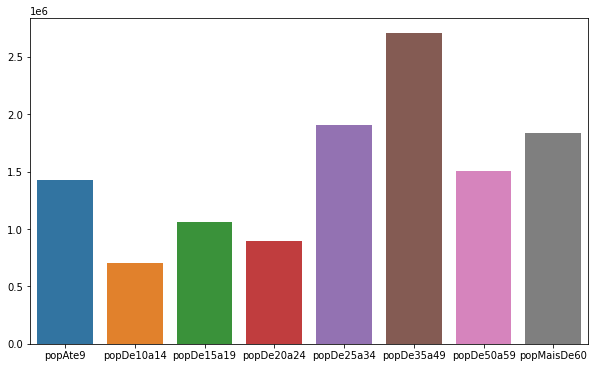

In [9]:
faixas_etarias = df.columns[:8]
plt.figure(figsize=(10, 6))
sns.barplot(x=faixas_etarias, y=df[faixas_etarias].sum())

<AxesSubplot:>

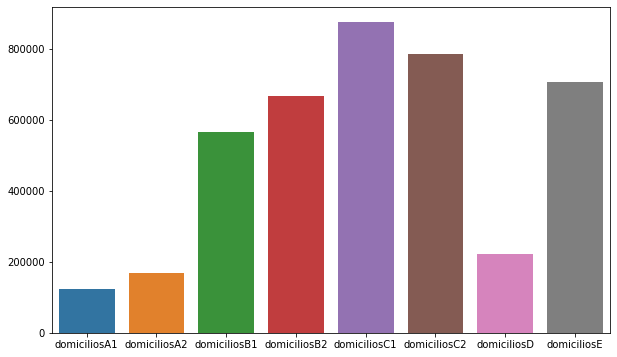

In [10]:
rendas = df.columns[8:]
plt.figure(figsize=(10, 6))
sns.barplot(x=rendas, y=df[rendas].sum())

### Normalização do dado

In [11]:
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df

,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,popDe35a49,popDe50a59,popMaisDe60,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE
0,0.348034,0.377154,0.383616,0.404028,0.397282,0.424328,0.427989,0.524390,0.000000,0.047184,0.241137,0.499314,0.362866,0.332007,0.336377,0.377975
1,0.063062,0.055877,0.081685,0.118406,0.145881,0.143268,0.198481,0.381447,0.202378,0.323387,0.406542,0.268535,0.105501,0.039163,0.043563,0.107793
2,0.414036,0.404129,0.414628,0.467199,0.485166,0.460081,0.467135,0.489640,0.000000,0.000000,0.156185,0.557323,0.466899,0.477435,0.465719,0.385041
3,0.026131,0.018772,0.024381,0.044004,0.058407,0.055649,0.072153,0.160218,0.089373,0.124394,0.171002,0.117620,0.049462,0.017095,0.012575,0.026932
4,0.139477,0.131792,0.156661,0.192592,0.201854,0.211622,0.268412,0.427480,0.000000,0.056509,0.196905,0.341190,0.243722,0.134299,0.165269,0.170189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,0.079851,0.080374,0.087810,0.111873,0.125044,0.148705,0.211005,0.399121,0.134918,0.203096,0.314565,0.253432,0.120176,0.058105,0.045808,0.073195
289,0.113346,0.103936,0.104389,0.131148,0.159935,0.179238,0.185998,0.234660,0.247207,0.283849,0.269784,0.135240,0.063105,0.043472,0.031287,0.255983
290,0.502899,0.512084,0.517106,0.537822,0.526155,0.523668,0.508019,0.654251,0.000000,0.000000,0.192954,0.516362,0.513371,0.543306,0.481737,0.502633
291,0.403045,0.402037,0.437800,0.503968,0.515026,0.561253,0.674504,0.962604,0.001146,0.162626,0.558995,0.922082,0.543918,0.382725,0.427545,0.456836


### Definição da quantidade ideal de clusters usando o método do cotovelo

In [12]:
wcss = []
clusters = range(1, 21)
for i in clusters:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
    
wcss

[113.73109814362952,
 56.85656214440624,
 40.50576257488867,
 31.674199003545173,
 25.765692175215243,
 22.032326034061818,
 18.728017893587936,
 16.15234388510883,
 14.277363179758414,
 13.08645869089855,
 11.986889265461427,
 10.896435457009128,
 10.287921160534626,
 9.540371344311795,
 8.861445262667859,
 8.222000280258698,
 7.879919915298755,
 7.496720358005715,
 7.0019672838529985,
 6.849686897435527]

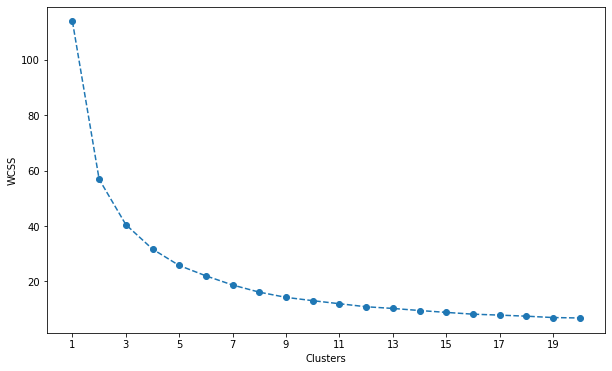

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(clusters, wcss, "o--")
plt.xlabel("Clusters")
plt.ylabel("WCSS")
plt.xticks(range(1, 21, 2));

In [14]:
abs(np.diff(np.array(wcss)))

array([56.874536  , 16.35079957,  8.83156357,  5.90850683,  3.73336614,
        3.30430814,  2.57567401,  1.87498071,  1.19090449,  1.09956943,
        1.09045381,  0.6085143 ,  0.74754982,  0.67892608,  0.63944498,
        0.34208036,  0.38319956,  0.49475307,  0.15228039])

### Clusterização

In [15]:
n_clusters=4
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(df)
labels = kmeans.labels_

labels

array([3, 1, 3, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 3, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 3, 0, 1, 0, 3, 0, 0, 1, 1, 1, 0, 0, 3, 0, 0, 1,
       3, 0, 0, 0, 2, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 2, 0, 1, 1, 2, 0, 0,
       1, 0, 0, 0, 3, 0, 3, 0, 3, 3, 0, 1, 0, 0, 0, 2, 1, 3, 3, 1, 1, 0,
       2, 0, 3, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 3, 3, 3, 3, 1, 3, 1, 3,
       0, 0, 3, 3, 1, 3, 1, 0, 3, 1, 0, 0, 1, 1, 2, 3, 1, 1, 3, 3, 0, 0,
       3, 0, 3, 1, 1, 0, 0, 0, 0, 1, 1, 3, 0, 0, 0, 0, 2, 0, 2, 1, 0, 1,
       1, 3, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 2, 1, 1, 1, 3, 3, 0, 0,
       3, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 3, 1, 1, 3, 3, 3, 1, 3, 1,
       1, 3, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 1, 3, 2,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 3, 0, 1, 0, 0, 1, 3, 1, 1, 0, 1, 0,
       0, 1, 3, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 3, 1, 1, 3, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 3, 3, 3, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       3, 0, 1, 1, 2, 2, 0], dtype=int32)

In [16]:
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3], dtype=int32), array([119, 110,  13,  51]))

#### Estudo dos centróides dos clusters

In [18]:
centers = kmeans.cluster_centers_
centers = scaler.inverse_transform(centers)
cluster_centers = pd.DataFrame(centers, columns=df.columns)

cluster_centers

,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,popDe35a49,popDe50a59,popMaisDe60,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE
0,1443.025210,671.302521,1059.008403,971.630252,2184.478992,3125.092437,1822.831933,2597.033613,366.285714,393.655462,975.890756,812.428571,885.991597,691.478992,173.571429,735.420168
1,4017.736364,1923.990909,3045.236364,2775.472727,6287.527273,9058.600000,5523.218182,7623.227273,709.745455,974.918182,2877.318182,2587.454545,2736.500000,2105.336364,517.790909,2138.690909
2,20411.153846,10215.692308,14910.307692,11577.307692,23381.461538,32644.000000,16307.923077,15128.307692,53.000000,357.692308,3169.384615,6530.538462,11396.230769,11794.461538,3755.153846,9054.923077
3,10798.803922,5398.098039,7968.098039,6325.705882,12761.745098,17883.254902,9167.352941,9596.254902,8.647059,172.117647,1802.803922,3918.098039,6289.235294,6260.509804,1899.705882,5243.490196


Acima, temos os centroides de cada cluster.<br>
- No cluster 0 há menos população que os outros e há um equilíbrio de tipos de randa com uma leve predominância para classe média (B1 e B2). <br>
- No cluster 1, os bairros possuem uma maior população com 25+ anos em relação às outras faixas etárias e aos outros clusters. Além disso, possui domicílios de com maior renda (A1, A2, B1 e B2). Portanto é onde ocorreria a maior presença de público alvo. <br> 
- No cluster 2 temos bairros populosos, média de mais de 10k para cada faixa etária. Havendo grande predominância presença de população de renda mais baixa (C1, C2, D e E) e com pouquíssimas residências de classe alta (A1 e A2).
- No cluster 3 há uma grande população para todas as faixas etárias e há comparativamente poucos domicílos de renda mais alta (A1 e A2). <br>

In [19]:
clustered_df = df.copy()
clustered_df['cluster'] = labels

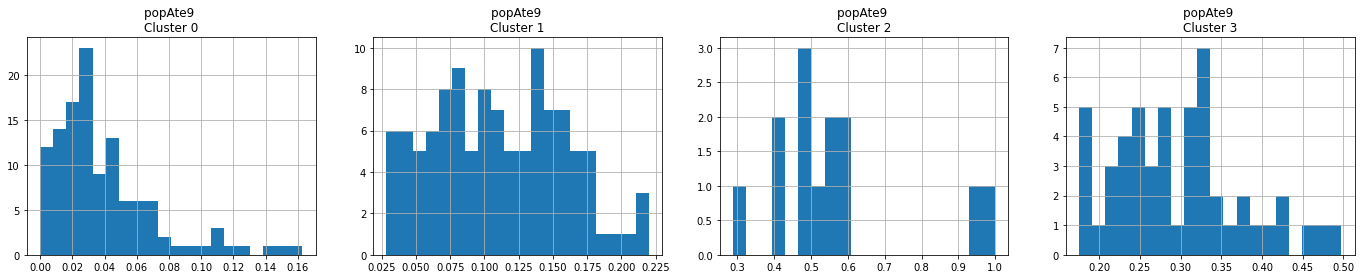

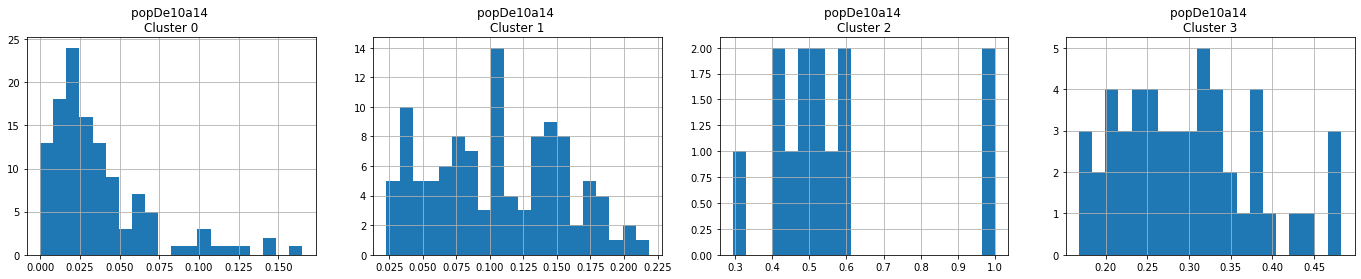

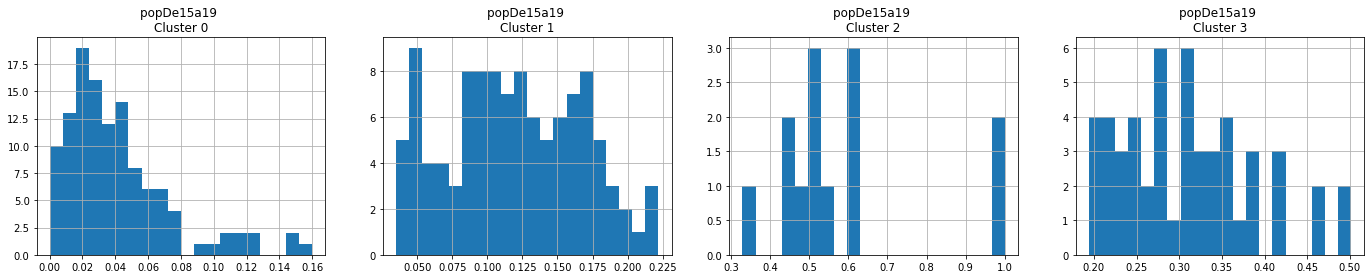

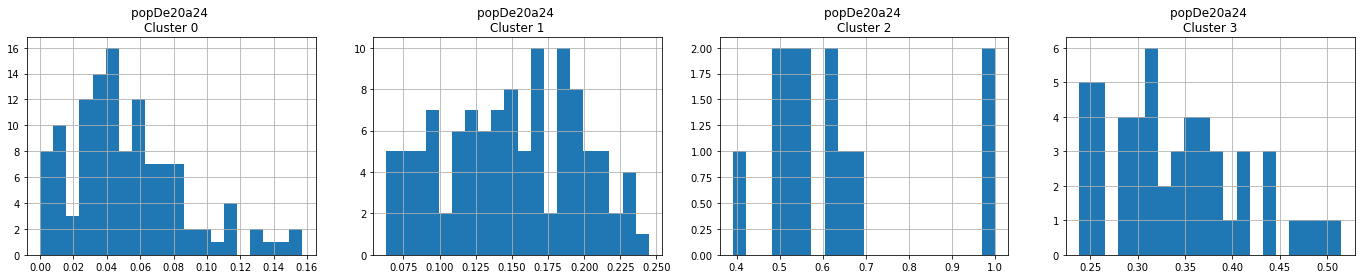

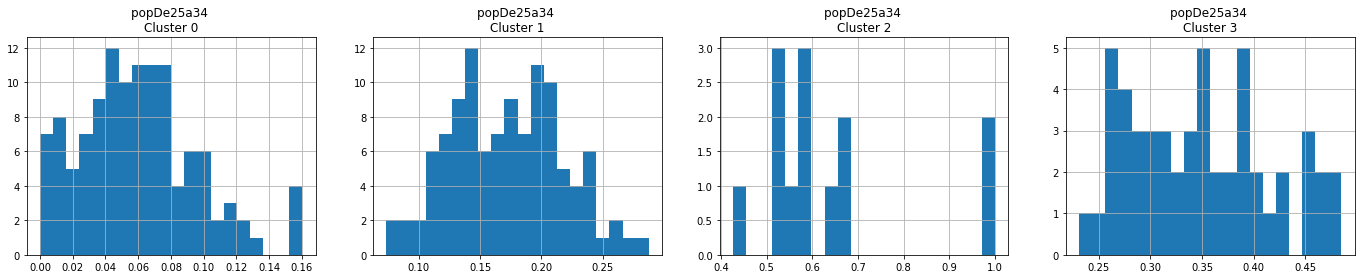

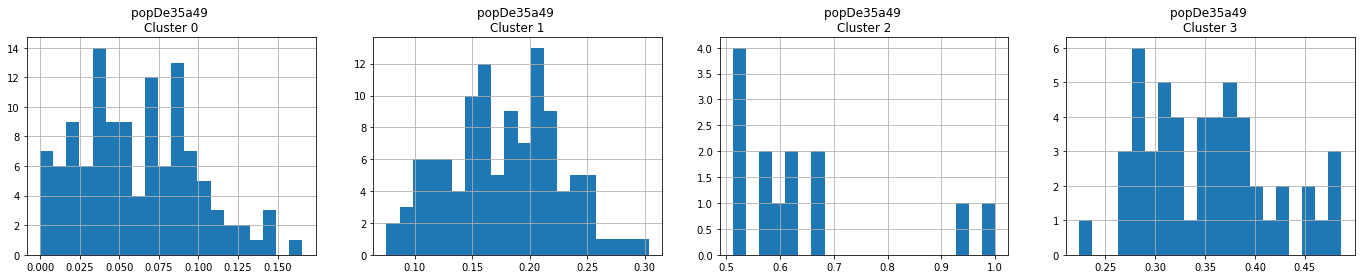

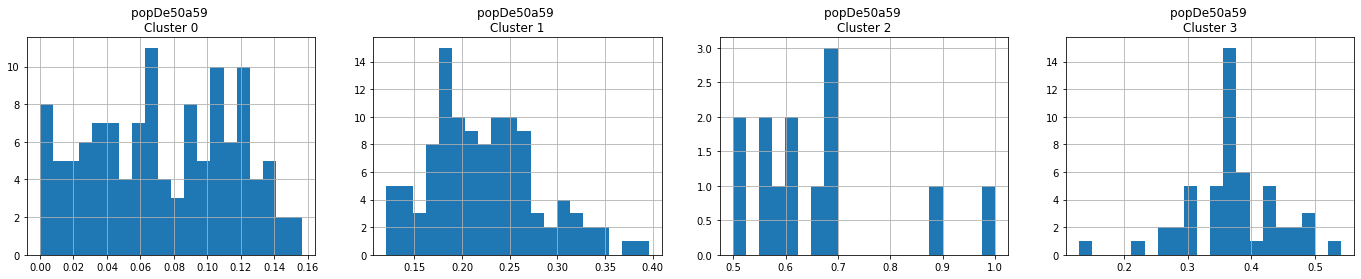

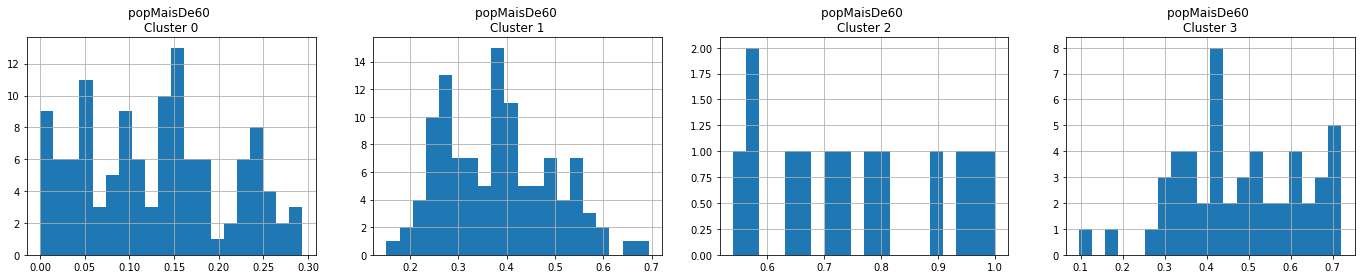

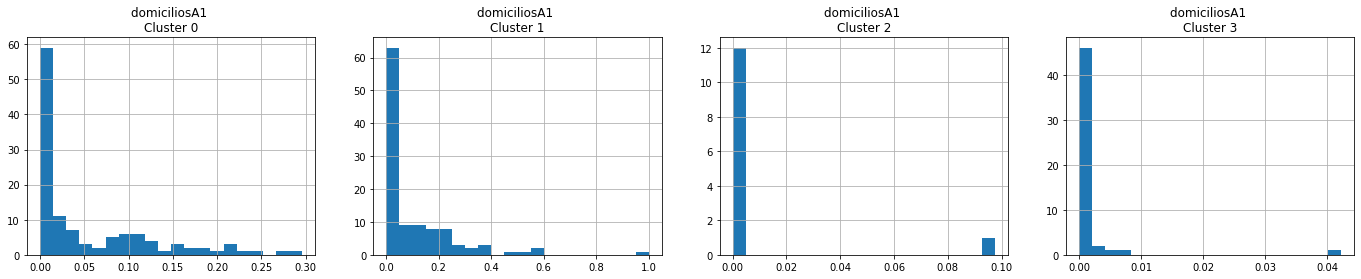

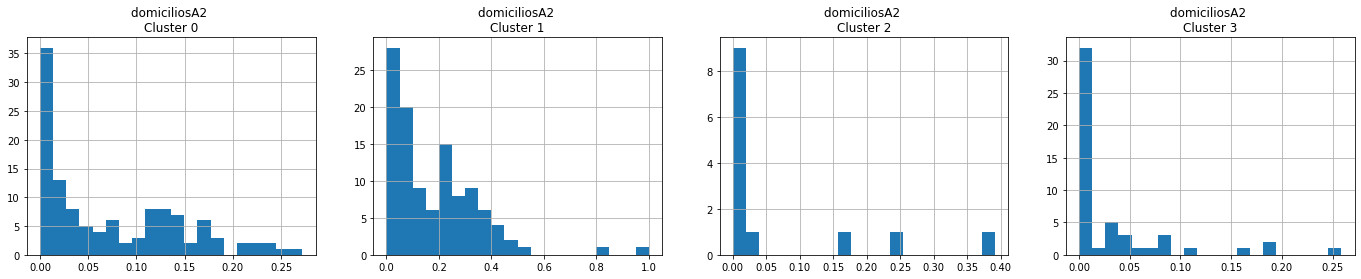

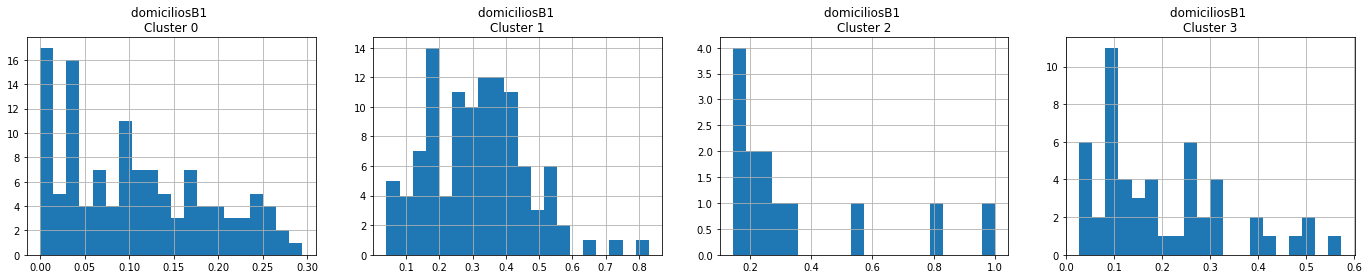

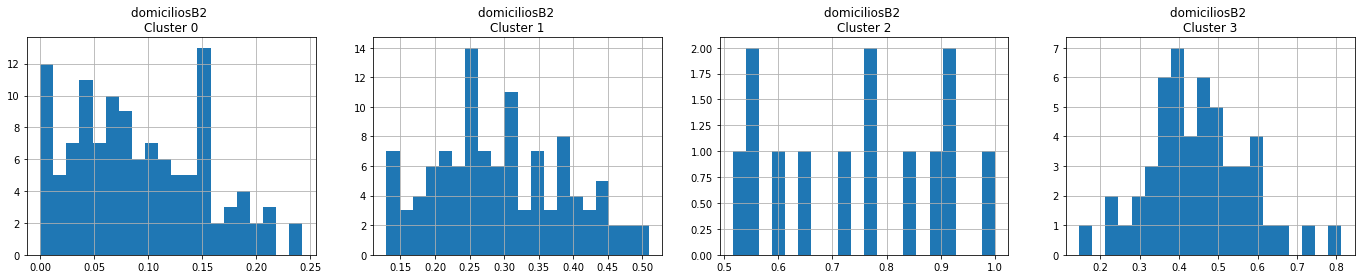

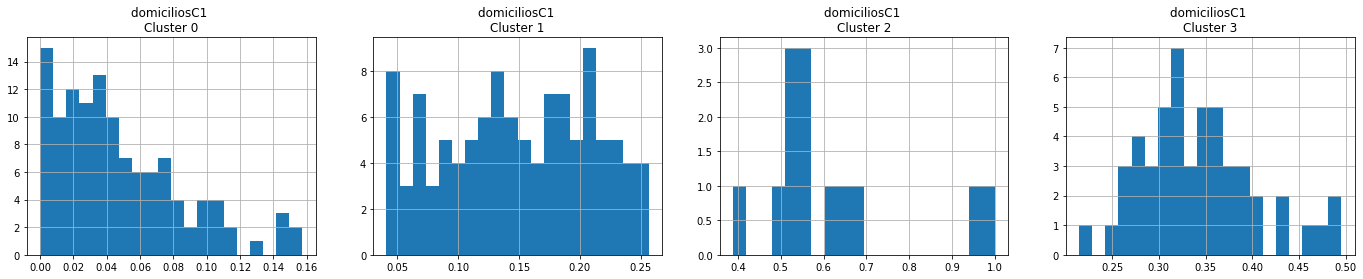

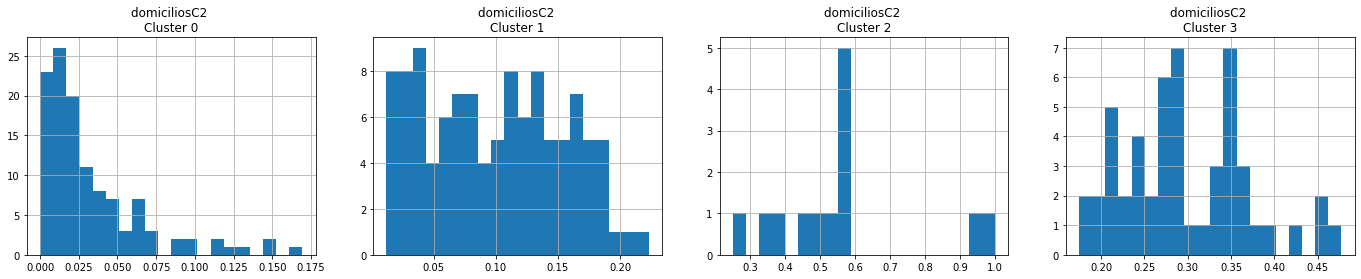

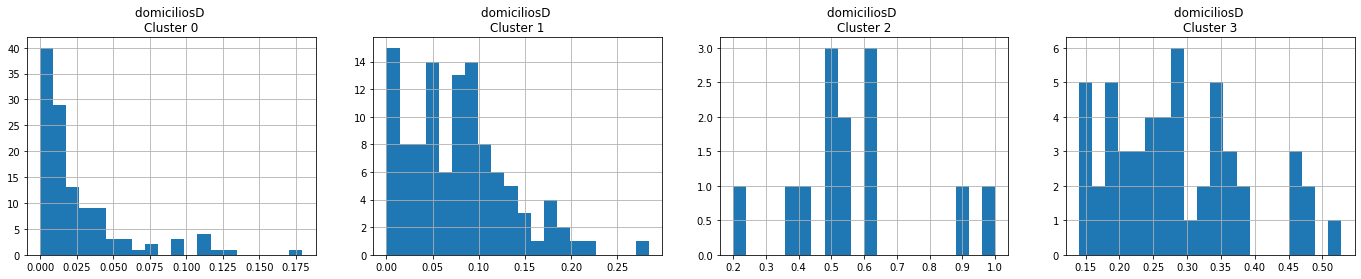

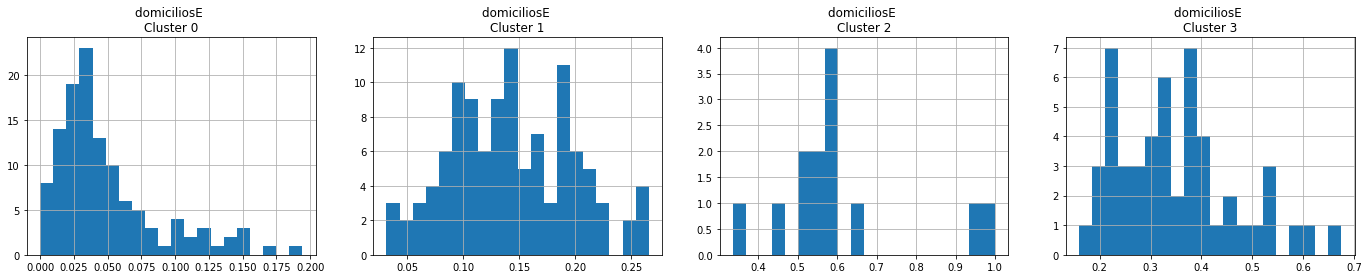

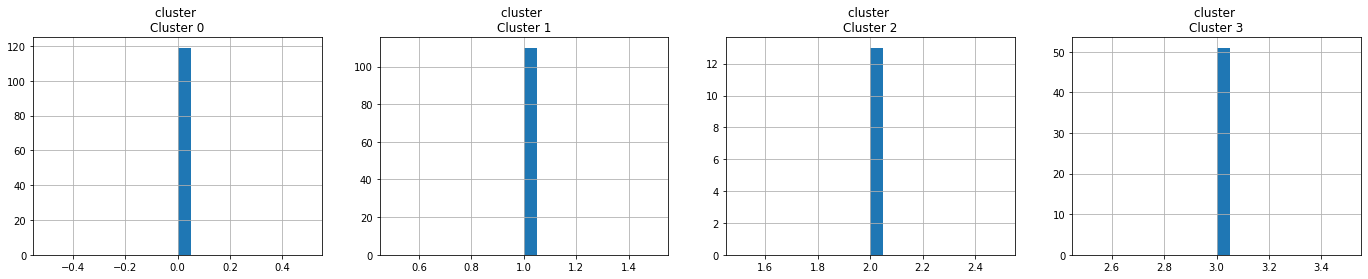

In [20]:
for col in clustered_df.columns:
    plt.figure(figsize=(30, 4))
    for j in range(n_clusters):
        plt.subplot(1, n_clusters+1, j+1)
        cluster = clustered_df.query(f"cluster == {j}")
        cluster[col].hist(bins=20)
        plt.title(f"{col} \nCluster {j}")
    plt.show()

#### Visualização dos clusters com o PCA

In [21]:
pca = PCA(n_components=2)
pca_result = pd.DataFrame(pca.fit_transform(clustered_df), columns=['pca1', 'pca2'])
pca_result['clusters'] = clustered_df.cluster
pca_result

,pca1,pca2,clusters
0,2.168933,-0.059033,3
1,-0.038344,-0.163905,1
2,2.247625,0.140784,3
3,-1.082688,-0.008384,0
4,0.073880,0.125003,1
...,...,...,...
288,-0.035246,-0.143782,1
289,-0.051667,-0.158937,1
290,1.431974,0.760762,2
291,1.503431,0.820312,2


<AxesSubplot:xlabel='pca1', ylabel='pca2'>

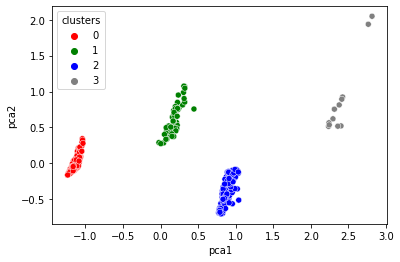

In [17]:
sns.scatterplot(x="pca1", y="pca2", hue="clusters", data=pca_result, palette=['red', 'green', 'blue', 'gray'])

### Comparação de resultados

In [22]:
df_original['cluster'] = labels
df_original

,codigo,nome,cidade,estado,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,...,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento,potencial,cluster
0,355030251,A. E. Carvalho,São Paulo,SP,94034,12668,6853,9836,7487,14535,...,2197,4368,6681,7011,2247,5670,1501,1.746073e+05,2,3
1,35503020,Aclimação,São Paulo,SP,32791,2297,1017,2096,2197,5341,...,3704,2351,1946,827,291,1617,5920,1.467713e+06,2,1
2,355030285,Adventista,São Paulo,SP,104193,15070,7343,10631,8657,17749,...,1423,4875,8595,10082,3111,5776,1284,1.253857e+05,1,3
3,35503088,Água Branca,São Paulo,SP,12721,953,343,627,819,2142,...,1558,1032,915,361,84,404,6278,1.266143e+06,2,0
4,35503066,Água Funda,São Paulo,SP,48417,5078,2396,4018,3571,7388,...,1794,2986,4489,2836,1104,2553,1905,8.172950e+05,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,355030213,Vila Sônia,São Paulo,SP,34061,2908,1462,2253,2076,4579,...,2866,2219,2216,1227,306,1098,5285,1.400296e+06,2,1
289,355030207,Vila Suzana,São Paulo,SP,35403,4127,1890,2678,2433,5855,...,2458,1186,1166,918,209,3840,7418,1.492280e+06,2,1
290,355030162,Vila Terezinha,São Paulo,SP,122359,18304,9304,13258,9965,19248,...,1758,4517,9450,11473,3218,7540,1252,8.833971e+04,1,2
291,355030157,Vila Zatt,São Paulo,SP,125864,14670,7305,11225,9338,18841,...,5093,8063,10012,8082,2856,6853,1936,3.069750e+05,2,2


In [23]:
df_original[['potencial', 'cluster', 'codigo']].groupby(by=['cluster', 'potencial']).count().rename(columns={'codigo': 'quantidade'})

quantidade
cluster potencial            
0       0                  42
        1                  40
        2                  37
1       0                   4
        1                  21
        2                  85
2       1                   9
        2                   4
3       1                  31
        2                  20

In [24]:
df_original[['cluster', 'faturamento']].groupby(by=['cluster']).mean().astype(int)

,faturamento
cluster,
0,1021180
1,1110876
2,248079
3,401066


In [25]:
df_original.to_csv('./dados/final_clusterizado.csv', index=False)